In [1]:
%matplotlib inline


In [2]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [50]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

store = pd.read_csv("store.csv")

# Review store DataFrame only usong the store as an example
store

Saving store.csv to store (1).csv


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [53]:
# dropping all the NaN values first 
store.dropna(inplace=True)
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
10,11,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
13,14,a,a,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
14,15,d,c,4110.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1104,1105,c,c,330.0,11.0,2008.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [56]:
# creating a new data frame after dropping columns ( all this for example )
store_n=store.drop(columns=["StoreType","Assortment","Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"], axis=1)

In [76]:
# review new store dataframe 
display(store_n.head())
display(store_n.tail())

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
1,2,570.0,11.0,2007.0
2,3,14130.0,12.0,2006.0
10,11,960.0,11.0,2011.0
13,14,1300.0,3.0,2014.0
14,15,4110.0,3.0,2010.0


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
1104,1105,330.0,11.0,2008.0
1105,1106,5330.0,9.0,2011.0
1106,1107,1400.0,6.0,2012.0
1108,1109,3490.0,4.0,2011.0
1110,1111,1900.0,6.0,2014.0


In [62]:
# store dtypes to check if no veriables are in columns like first df
store_n.dtypes

Store                          int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
dtype: object

In [65]:
# double checking rows for any String that might be in there
store_n.apply(lambda row: row.astype(str).str.contains('data').any(), axis=1)

1       False
2       False
10      False
13      False
14      False
        ...  
1104    False
1105    False
1106    False
1108    False
1110    False
Length: 365, dtype: bool

In [87]:
# giving X and y values to df and reshaping df for 2D 
X = store_n.iloc[:,1:2].values
y = store_n.iloc[:,1].values.reshape(-1,1)


In [88]:
#import StandarScalar
from sklearn.preprocessing import StandardScaler

#standarScakar variables
sc_X = StandardScaler()
sc_y = StandardScaler()

#setting sc variables to fit X & y
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [89]:
#fit regression models
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


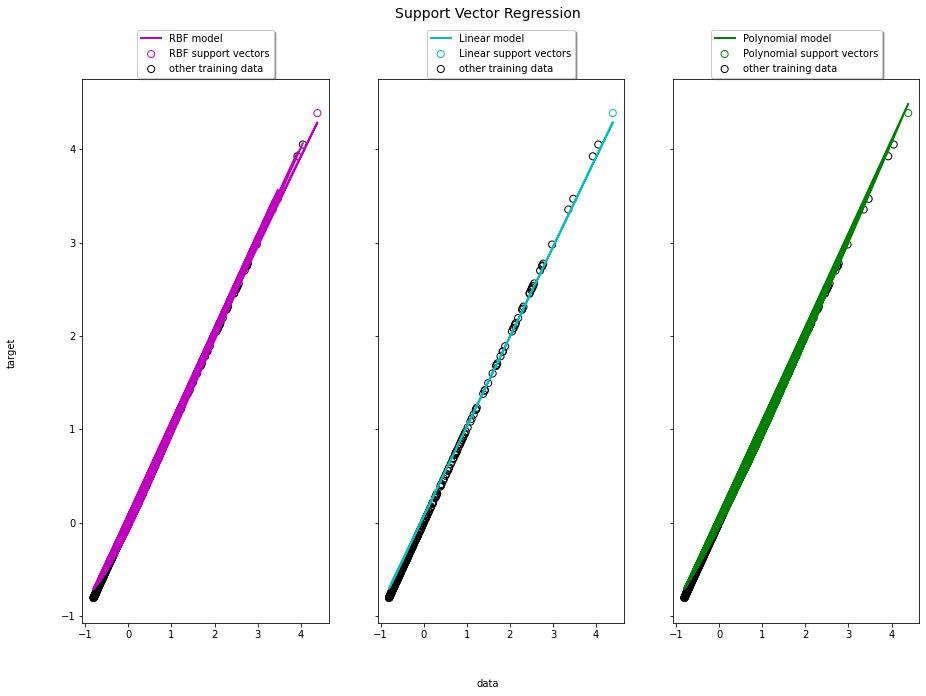

In [90]:

lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()